## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:

# 1. Obtain Data

In [587]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [588]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Scrub and Clean Data

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check for erroneous values

In [590]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Notes:
- sqft_basement change to float, update '?' values

In [591]:
# sqft_basement: check for instances of '?'
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1548.0        1
588.0         1
784.0         1
792.0         1
1816.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [592]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)

In [593]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Check for nulls

In [594]:
# Check sum of nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note: Check waterfront, view, and yr_renovated

In [595]:
# Get statistics
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18804.000000,21082.000000,17389.000000
mean,0.007552,0.233327,82.991949
std,0.086573,0.765066,398.481819
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [596]:
null_list = ['waterfront', 'view', 'yr_renovated']

for feature in null_list:
    print(df[feature].value_counts())

0.0    18662
1.0      142
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64


Notes:
- waterfront has 2339 null values
- view has 61 null values
- yr_renovated has 3754 null values
- The majority of the data is 0 for these features. Update null values to 0.

In [597]:
# Update null values to 0
df.fillna(0, inplace = True)

In [598]:
# Double-check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [599]:
# Check for duplicates
print(len(df[df.duplicated()]))

0


## Initial Feature Engineering

Notes:
- yr_renovated: convert to binary {0: not renovated, 1: renovated}
- sqft_basement: convert to binary {0: no basement, 1: has basement}
- view: convert to binary {0: not viewed, 1: has been viewed}
- date and id: not useful, drop
- lat and long: should be categorical, however might be better to drop (i think zip code will be a similar/better feauture)
- bathrooms and bedrooms: round

In [600]:
# yr_renovated
df['yr_renovated'].value_counts()

0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [601]:
# Create new column renovated
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
# Drop yr_renovated column
df = df.drop('yr_renovated', axis=1)

In [602]:
# Check new column
df['renovated'].value_counts()

0    20420
1      723
Name: renovated, dtype: int64

In [603]:
# sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [604]:
# Create new column basement
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
# Drop sqft_basement column
df = df.drop('sqft_basement', axis=1)

In [605]:
# Check new column
df['basement'].value_counts()

0    12826
1     8317
Name: basement, dtype: int64

In [606]:
# view
df['view'].value_counts()

0.0    19079
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [607]:
# Update view
df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

In [608]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [609]:
# Drop: 
# id: not useful, drop
# lat and long: should be categorical, drop (i think zip code will be a similar/better feauture)
df.drop(columns=['date', 'id', 'lat', 'long'], inplace=True) 

In [610]:
# cols to round
cols = ['bedrooms', 'bathrooms', 'floors']

df[cols] = df[cols].round(0)
df[cols]

,bedrooms,bathrooms,floors
0,3,1.0,1.0
1,3,2.0,2.0
2,2,1.0,1.0
3,4,3.0,1.0
4,3,2.0,1.0
...,...,...,...
21592,3,2.0,3.0
21593,4,2.0,2.0
21594,2,1.0,2.0
21595,3,2.0,2.0


In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  float64
 7   view           21143 non-null  int64  
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
 15  renovated      21143 non-null  int64  
 16  basement       21143 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 2.9 MB


In [612]:
df['bathrooms'] = df.bathrooms.astype(int)
df['floors'] = df.floors.astype(int)
df['waterfront'] = df.waterfront.astype(int)

## Check for outliers

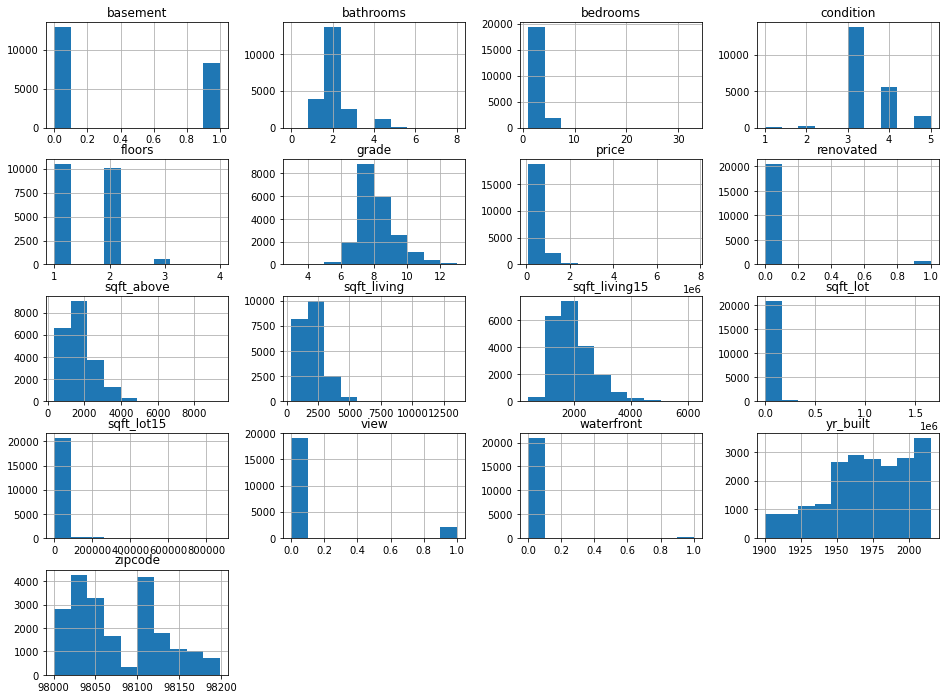

In [613]:
df.hist(figsize=(16, 12));

Notes: Look at bathrooms, bedrooms, price, sqft features

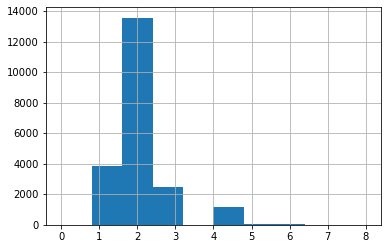

In [614]:
# bathrooms
df['bathrooms'].hist();

In [615]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.bathrooms.quantile(q=q)))

0.9 percentile: 3.0
0.91 percentile: 3.0
0.92 percentile: 3.0
0.93 percentile: 3.0
0.94 percentile: 3.0
0.95 percentile: 4.0
0.96 percentile: 4.0
0.97 percentile: 4.0
0.98 percentile: 4.0
0.99 percentile: 4.0


In [616]:
df['bathrooms'].value_counts()

2    13568
1     3837
3     2470
4     1181
5       55
6       23
8        4
0        3
7        2
Name: bathrooms, dtype: int64

In [617]:
# Set limit to 4
df = df[df['bathrooms']<=4]

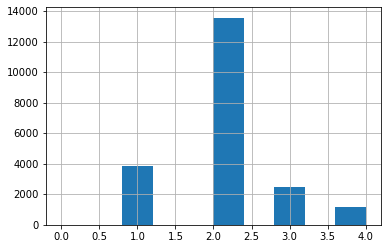

In [618]:
# bathrooms
df['bathrooms'].hist();

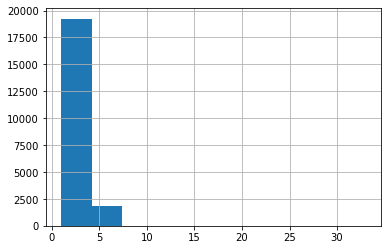

In [619]:
# bedrooms
df['bedrooms'].hist();

In [620]:
df['bedrooms'].value_counts()

3     9639
4     6716
2     2691
5     1525
6      247
1      191
7       30
8       11
9        5
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [621]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.bedrooms.quantile(q=q)))

0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0


In [622]:
# Set limit to 12
df = df[df['bedrooms']<=5]

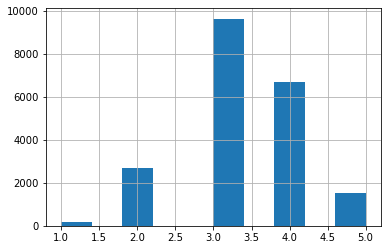

In [623]:
df['bedrooms'].hist()

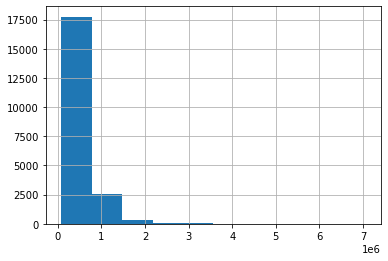

In [624]:
# price
df.price.hist();

In [625]:
df.price.value_counts()

350000.0    166
450000.0    163
550000.0    153
500000.0    149
425000.0    146
           ... 
575700.0      1
641200.0      1
739500.0      1
418900.0      1
884744.0      1
Name: price, Length: 3538, dtype: int64

In [626]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.9 percentile: 872500.0
0.91 percentile: 900000.0
0.92 percentile: 935000.0
0.93 percentile: 975000.0
0.94 percentile: 1030000.0
0.95 percentile: 1110000.0
0.96 percentile: 1220000.0
0.97 percentile: 1340000.0
0.98 percentile: 1547799.9999999884
0.99 percentile: 1870000.0


In [627]:
# Set limit to 12
df = df[df['price']<=1300000]

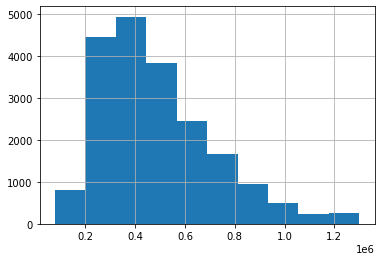

In [628]:
df.price.hist();

In [629]:
# Sqft features
sqft_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

# Removes feats with z-score above 3 for specific columns
# Reference https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
for feat in sqft_feats:
    df = df[np.abs(df[feat]-df[feat].mean()) <= (3*df[feat].std())]

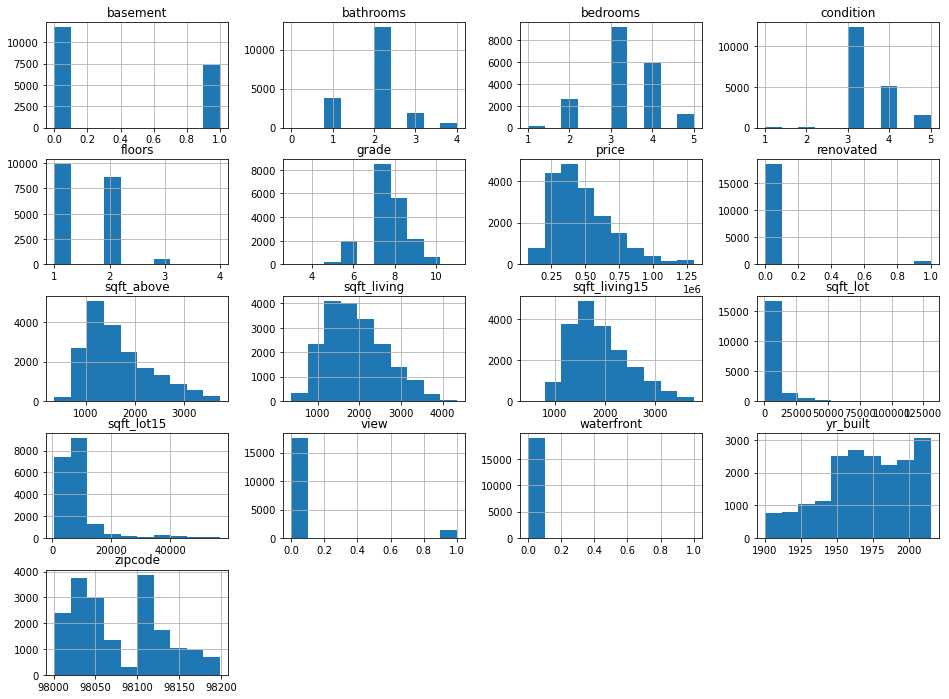

In [630]:
df.hist(figsize=(16,12));

## Normalize Continuous Features

In [631]:
# Log transform to reduce skewness
# Don't bother to normalize the price as this is the feature we will be predicting
# Remember that you can't take the logarithm of zero nor a negative number = N/A
continuous_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']
for var in continuous_feats:
    df[var]= np.log(df[var])

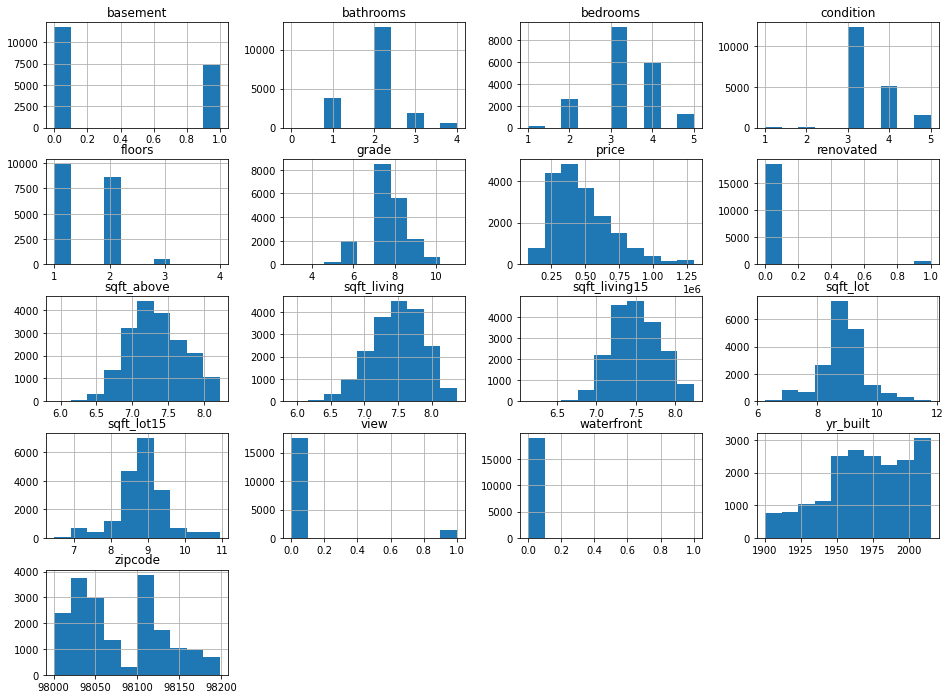

In [632]:
df.hist(figsize = (16,12));

In [633]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data  𝑚𝑜𝑟𝑒  normal, it will just change the mean and the standard error!

for var in continuous_feats:
    df[var] = (df[var] - df[var].mean()) / df[var].std()

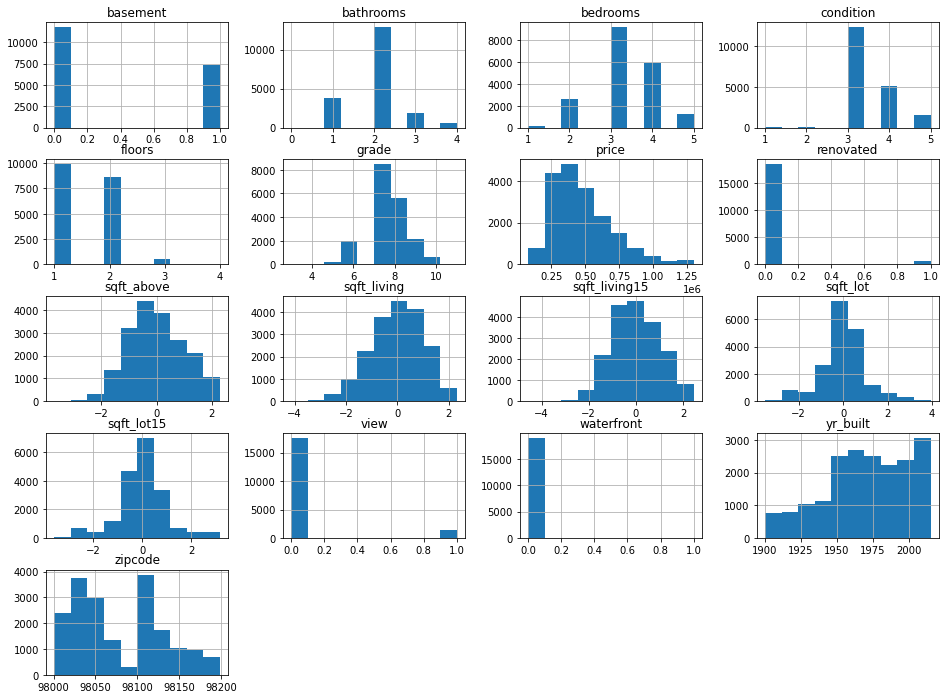

In [634]:
df.hist(figsize = (16, 12));

# Save Results

In [635]:
df.to_csv("df_cleaned.csv", index=False)

## One-hot encode Categorical Features

In [636]:
categorical_feats = ['basement', 'bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'renovated', 'view', 'waterfront', 'yr_built', 'zipcode']

# Convert to str
for col in categorical_feats:
    df[col] = df[col].astype('str')   

In [637]:
df = pd.get_dummies(df, drop_first = True)

In [638]:
df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-1.094025,-0.304754,-0.685256,-0.998763,-0.318812,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.945783,0.029881,0.894238,-0.223673,0.137644,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-2.212679,0.464870,-1.792018,1.365872,0.219208,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.235717,-0.469506,-0.987885,-0.949280,-0.503775,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.168241,0.177481,0.230685,-0.013055,0.110458,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Note: This is a lot of columns.

# Explore Data

## 3.3 Check for linearity for continous features

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warning

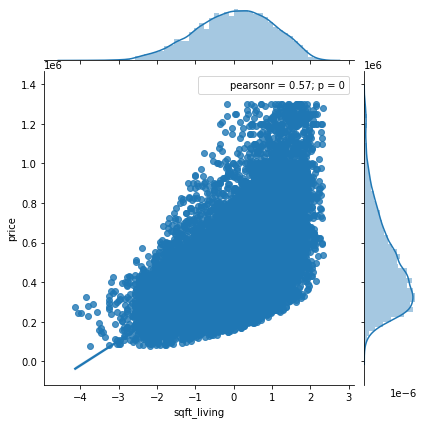

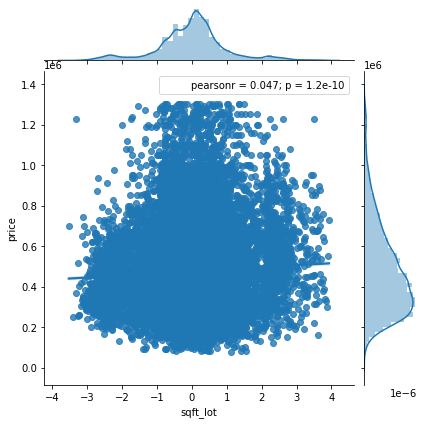

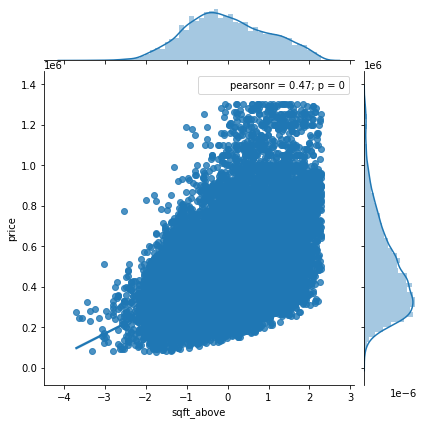

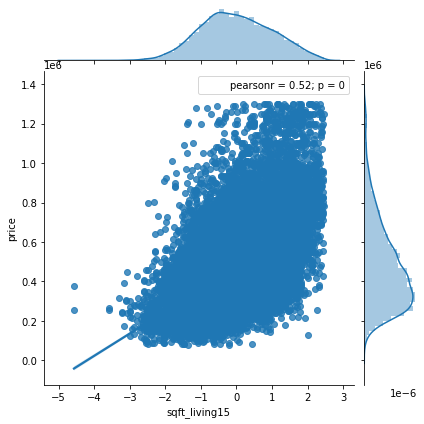

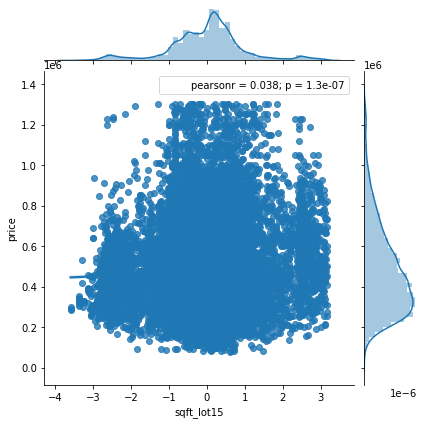

In [639]:
# Plot joint plots
continuous_feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for feat in continuous_feats:
    j = sns.jointplot(x = df[feat], y = df['price'], kind = 'reg')
    j.annotate(stats.pearsonr)

Note: sqft_living has the best linear relationship with price

## 3.4 Check for multicollinearity

In [640]:
corr = df[continuous_feats].corr()
corr

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
sqft_living,1.000000,0.267917,0.834233,0.714534,0.248892
sqft_lot,0.267917,1.000000,0.244999,0.329466,0.910813
sqft_above,0.834233,0.244999,1.000000,0.676238,0.229951
sqft_living15,0.714534,0.329466,0.676238,1.000000,0.341864
sqft_lot15,0.248892,0.910813,0.229951,0.341864,1.000000


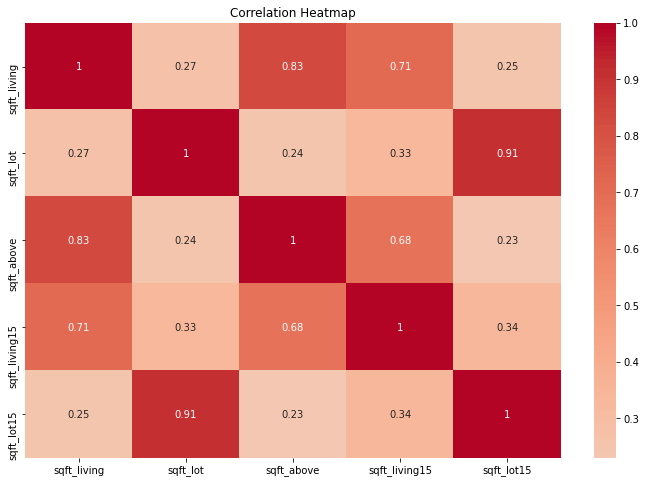

In [641]:
# Plot heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [642]:
corr

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
sqft_living,1.000000,0.267917,0.834233,0.714534,0.248892
sqft_lot,0.267917,1.000000,0.244999,0.329466,0.910813
sqft_above,0.834233,0.244999,1.000000,0.676238,0.229951
sqft_living15,0.714534,0.329466,0.676238,1.000000,0.341864
sqft_lot15,0.248892,0.910813,0.229951,0.341864,1.000000


In [643]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [644]:
abs(df.corr()) > 0.75

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living15,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zipcode_98188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
zipcode_98198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
zipcode_98199,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
renovated_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [645]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.910813
"(sqft_above, sqft_living)",0.834233


In [646]:
df.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True) 

In [647]:
df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       ...
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199',
       'renovated_1', 'basement_1'],
      dtype='object', length=214)

# Model Data 1

To start, perform a train-test split and create an initial regression model to model the price using all of your available features.

Note: In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.
If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.

In [648]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [649]:
df.columns = [col_formatting(col) for col in df.columns]

In [650]:
list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_2',
 'floors_3',
 'floors_4',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934

In [651]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [652]:
train, test = train_test_split(df)

In [653]:
print(len(train), len(test))
train.head()

14308 4770


,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
12350,285000.0,-2.145482,-0.104476,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21588,429000.0,-0.482753,-2.479088,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11797,491500.0,-0.518166,-0.665939,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12880,335000.0,1.035982,0.112545,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
17965,575000.0,0.620505,0.483079,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [654]:
test.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
7230,674725.0,1.075096,0.486267,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16332,480000.0,-0.231390,0.138037,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1332,805000.0,-0.379297,-0.223733,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7130,510000.0,1.679193,-0.611834,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11308,460000.0,-0.608851,0.205549,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [655]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     332.5
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:29:54   Log-Likelihood:            -1.8328e+05
No. Observations:               14308   AIC:                         3.670e+05
Df Residuals:                   14095   BIC:                         3.686e+05
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.249e+05   7.01e+04      4.631      0.000    1.87e+05    4.62e+05
sqft_living     7.48e+04   1611.714     46.409      0.000    7.16e+04     7.8e+04
sqft_lot       2.567e+04   1293.787     19.843      0.000    2.31e+04    2.82e+04
bedrooms_2     -1.51e+04   7945.461     -1.901      0.057   -3.07e+04     470.628
bedrooms_3    -1.424e+04   8040.362     -1.770      0.077      -3e+04    1524.861
bedrooms_4     -1.49e+04   8308.088     -1.794      0.073   -3.12e+04    1381.779
bedrooms_5    -2.326e+04   8858.937     -2.626      0.009   -4.06e+04   -5895.086
bathrooms_1    6.478e+04   6.36e+04      1.018      0.309      -6e+04     1.9e+05
bathrooms_2    6.024e+04   6.37e+04      0.946      0.344   -6.46e+04    1.85e+05
bathrooms_3    8.186e+04   6.38e+04      1.284      0.199   -4.31e+04    2.07e+05
bathrooms_4    1.027e+05   6.39e+04      1.608      0.108   -2.25e+04    2.28e+05
floors_2       -769.6316   2392.187     -0.322      0.748   -5458.635    3919.372
floors_3      -3.398e+04   5826.872     -5.831      0.000   -4.54e+04   -2.26e+04
floors_4      -1.126e+05   5.19e+04     -2.170      0.030   -2.14e+05   -1.09e+04
waterfront_1   2.551e+05   1.48e+04     17.262      0.000    2.26e+05    2.84e+05
view_1         9.519e+04   3103.373     30.674      0.000    8.91e+04    1.01e+05
condition_2    7.191e+04   2.48e+04      2.894      0.004    2.32e+04    1.21e+05
condition_3    9.144e+04   2.35e+04      3.895      0.000    4.54e+04    1.37e+05
condition_4     1.14e+05   2.35e+04      4.854      0.000     6.8e+04     1.6e+05
condition_5    1.485e+05   2.36e+04      6.291      0.000    1.02e+05    1.95e+05
grade_11       9.926e+04   1.41e+04      7.036      0.000    7.16e+04    1.27e+05
grade_3       -1.176e-09   4.18e-10     -2.812      0.005      -2e-09   -3.56e-10
grade_4       -1.852e+05   2.01e+04     -9.222      0.000   -2.25e+05   -1.46e+05
grade_5       -2.268e+05   9724.536    -23.326      0.000   -2.46e+05   -2.08e+05
grade_6       -2.273e+05   6370.503    -35.678      0.000    -2.4e+05   -2.15e+05
grade_7       -2.073e+05   5354.646    -38.723      0.000   -2.18e+05   -1.97e+05
grade_8       -1.598e+05   4967.267    -32.164      0.000    -1.7e+05    -1.5e+05
grade_9       -7.089e+04   5009.381    -14.152      0.000   -8.07e+04   -6.11e+04
yr_built_1901 -6.201e+04    2.2e+04     -2.813      0.005   -1.05e+05   -1.88e+04
yr_built_1902 -1.957e+04   2.31e+04     -0.847      0.397   -6.49e+04    2.57e+04
yr_built_1903 -3.576e+04   2.09e+04     -1.710      0.087   -7.68e+04    5240.316
yr_built_1904  2478.7433   2.05e+04      0.121      0.904   -3.77e+04    4.26e+04
yr_built_1905  2.716e+04   1.89e+04      1.435      0.151   -9941.372    6.43e+04
yr_built_1906  4071.0828   1.66e+04      0.245      0.806   -2.85e+04    3.66e+04
yr_built_1907  4442.7709   1.85e+04      0.240   

## Remove the Uninfluential Features

In [656]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

214 117
['sqft_living', 'sqft_lot', 'bedrooms_5', 'floors_3', 'floors_4']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.249e+05,7.01e+04,4.631,0.000,1.87e+05,4.62e+05
sqft_living,7.48e+04,1611.714,46.409,0.000,7.16e+04,7.8e+04
sqft_lot,2.567e+04,1293.787,19.843,0.000,2.31e+04,2.82e+04
bedrooms_2,-1.51e+04,7945.461,-1.901,0.057,-3.07e+04,470.628
bedrooms_3,-1.424e+04,8040.362,-1.770,0.077,-3e+04,1524.861


In [657]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     593.6
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:29:55   Log-Likelihood:            -1.8346e+05
No. Observations:               14308   AIC:                         3.672e+05
Df Residuals:                   14191   BIC:                         3.680e+05
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       3.76e+05   2.41e+04     15.577      0.000    3.29e+05    4.23e+05
sqft_living     7.73e+04   1246.834     61.997      0.000    7.49e+04    7.97e+04
sqft_lot       2.364e+04   1089.060     21.702      0.000    2.15e+04    2.58e+04
bedrooms_5    -1311.9502   3239.678     -0.405      0.686   -7662.144    5038.244
floors_3      -3.851e+04   5081.330     -7.578      0.000   -4.85e+04   -2.85e+04
floors_4      -1.249e+05   5.22e+04     -2.394      0.017   -2.27e+05   -2.26e+04
waterfront_1    2.56e+05   1.48e+04     17.272      0.000    2.27e+05    2.85e+05
view_1         9.565e+04   3089.686     30.959      0.000    8.96e+04    1.02e+05
condition_2    6.441e+04   2.49e+04      2.589      0.010    1.56e+04    1.13e+05
condition_3    8.219e+04   2.35e+04      3.497      0.000    3.61e+04    1.28e+05
condition_4     1.05e+05   2.35e+04      4.465      0.000    5.89e+04    1.51e+05
condition_5    1.408e+05   2.36e+04      5.963      0.000    9.45e+04    1.87e+05
grade_11       1.003e+05   1.42e+04      7.063      0.000    7.25e+04    1.28e+05
grade_3       -2.888e-10   1.53e-10     -1.885      0.059   -5.89e-10    1.16e-11
grade_4       -1.736e+05   1.97e+04     -8.804      0.000   -2.12e+05   -1.35e+05
grade_5       -2.218e+05   9390.161    -23.621      0.000    -2.4e+05   -2.03e+05
grade_6        -2.29e+05   6096.493    -37.560      0.000   -2.41e+05   -2.17e+05
grade_7       -2.139e+05   5189.244    -41.227      0.000   -2.24e+05   -2.04e+05
grade_8       -1.664e+05   4890.429    -34.018      0.000   -1.76e+05   -1.57e+05
grade_9       -7.359e+04   5000.849    -14.715      0.000   -8.34e+04   -6.38e+04
yr_built_1901 -5.876e+04   1.86e+04     -3.162      0.002   -9.52e+04   -2.23e+04
yr_built_1908 -3.155e+04   1.16e+04     -2.725      0.006   -5.42e+04   -8854.234
yr_built_1933  6.876e+04   2.42e+04      2.837      0.005    2.12e+04    1.16e+05
yr_built_1953  -2.03e+04   7680.102     -2.643      0.008   -3.54e+04   -5245.296
yr_built_1954 -2.765e+04   6351.548     -4.353      0.000   -4.01e+04   -1.52e+04
yr_built_1955  -2.57e+04   6806.720     -3.776      0.000    -3.9e+04   -1.24e+04
yr_built_1957 -3.061e+04   7764.319     -3.942      0.000   -4.58e+04   -1.54e+04
yr_built_1958 -2.367e+04   7519.653     -3.148      0.002   -3.84e+04   -8933.307
yr_built_1959 -2.288e+04   5971.828     -3.832      0.000   -3.46e+04   -1.12e+04
yr_built_1960 -2.206e+04   7108.981     -3.103      0.002    -3.6e+04   -8127.923
yr_built_1961 -2.933e+04   7214.473     -4.066      0.000   -4.35e+04   -1.52e+04
yr_built_1962 -2.701e+04   6312.646     -4.278      0.000   -3.94e+04   -1.46e+04
yr_built_1963 -2.144e+04   6958.685     -3.081      0.002   -3.51e+04   -7798.025
yr_built_1964 -2.974e+04   8813.816     -3.375      0.001    -4.7e+04   -1.25e+04
yr_built_1965  -3.46e+04   8036.188     -4.306   

Comment: You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

# Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [658]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 2.7353006118079035),
 ('sqft_lot', 2.07581062635844),
 ('bedrooms_5', 1.1865859963416439),
 ('floors_3', 1.3520805569524754),
 ('floors_4', 1.0081215495348816),
 ('waterfront_1', 1.0958533671940078),
 ('view_1', 1.284379441366803),
 ('condition_2', 1.3849009378537205),
 ('condition_3', 30.49233687915373),
 ('condition_4', 13.946415681600532),
 ('condition_5', 4.998948437143784),
 ('grade_11', 1.1121539500113211),
 ('grade_3', 1.006028155329993),
 ('grade_4', 1.112914177825057),
 ('grade_5', 1.6640556314973285),
 ('grade_6', 6.181695389453927),
 ('grade_7', 19.337709735237752),
 ('grade_8', 11.41304017539686),
 ('grade_9', 4.556718781811939),
 ('yr_built_1901', 1.019238893705982),
 ('yr_built_1908', 1.022537019904905),
 ('yr_built_1933', 1.014931808884353),
 ('yr_built_1953', 1.0576077404422413),
 ('yr_built_1954', 1.0660182951791868),
 ('yr_built_1955', 1.0703474966758613),
 ('yr_built_1957', 1.0515600931895992),
 ('yr_built_1958', 1.0525574565414584),
 ('yr_built_1959

## Perform Another Round of Feature Selection

In [659]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

117 112


In [660]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     532.9
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:30:08   Log-Likelihood:            -1.8435e+05
No. Observations:               14308   AIC:                         3.689e+05
Df Residuals:                   14196   BIC:                         3.698e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.752e+05   2689.647    102.322      0.000     2.7e+05     2.8e+05
sqft_living    9.965e+04   1092.738     91.196      0.000    9.75e+04    1.02e+05
sqft_lot       2.425e+04   1127.658     21.508      0.000     2.2e+04    2.65e+04
bedrooms_5    -1.075e+04   3436.186     -3.129      0.002   -1.75e+04   -4014.845
floors_3      -2.254e+04   5355.234     -4.209      0.000    -3.3e+04    -1.2e+04
floors_4      -1.106e+05   5.55e+04     -1.993      0.046   -2.19e+05   -1828.835
waterfront_1   2.541e+05   1.58e+04     16.113      0.000    2.23e+05    2.85e+05
view_1         1.085e+05   3267.886     33.200      0.000    1.02e+05    1.15e+05
condition_2   -2.835e+04   9167.477     -3.093      0.002   -4.63e+04   -1.04e+04
condition_5    4.138e+04   3031.283     13.651      0.000    3.54e+04    4.73e+04
grade_11       2.257e+05   1.46e+04     15.483      0.000    1.97e+05    2.54e+05
grade_3       -7.741e-10   5.12e-11    -15.114      0.000   -8.75e-10   -6.74e-10
grade_4        7.595e+04   1.99e+04      3.815      0.000    3.69e+04    1.15e+05
grade_5        1.228e+04   7885.672      1.557      0.120   -3181.513    2.77e+04
grade_9        7.829e+04   2875.723     27.224      0.000    7.27e+04    8.39e+04
yr_built_1901 -7.405e+04   1.97e+04     -3.751      0.000   -1.13e+05   -3.54e+04
yr_built_1908  -4.08e+04   1.23e+04     -3.315      0.001   -6.49e+04   -1.67e+04
yr_built_1933  7.104e+04   2.58e+04      2.755      0.006    2.05e+04    1.22e+05
yr_built_1953 -2.421e+04   8162.833     -2.965      0.003   -4.02e+04   -8206.242
yr_built_1954 -3.253e+04   6745.916     -4.822      0.000   -4.58e+04   -1.93e+04
yr_built_1955 -3.335e+04   7219.084     -4.619      0.000   -4.75e+04   -1.92e+04
yr_built_1957 -3.775e+04   8249.404     -4.576      0.000   -5.39e+04   -2.16e+04
yr_built_1958 -3.057e+04   7992.696     -3.825      0.000   -4.62e+04   -1.49e+04
yr_built_1959 -2.628e+04   6345.407     -4.142      0.000   -3.87e+04   -1.38e+04
yr_built_1960 -2.634e+04   7551.974     -3.488      0.000   -4.11e+04   -1.15e+04
yr_built_1961 -3.783e+04   7663.107     -4.937      0.000   -5.29e+04   -2.28e+04
yr_built_1962 -3.586e+04   6692.095     -5.358      0.000    -4.9e+04   -2.27e+04
yr_built_1963 -2.777e+04   7383.865     -3.761      0.000   -4.22e+04   -1.33e+04
yr_built_1964 -3.148e+04   9368.471     -3.360      0.001   -4.98e+04   -1.31e+04
yr_built_1965 -4.097e+04   8535.926     -4.799      0.000   -5.77e+04   -2.42e+04
yr_built_1966 -3.788e+04   7605.278     -4.980      0.000   -5.28e+04    -2.3e+04
yr_built_1967 -1.834e+04   6342.297     -2.892      0.004   -3.08e+04   -5911.378
yr_built_1971 -2.788e+04    1.2e+04     -2.321      0.020   -5.14e+04   -4333.732
yr_built_1972  -3.04e+04   9924.882     -3.063      0.002   -4.99e+04   -1.09e+04
yr_built_1975 -2.972e+04   8589.984     -3.460   

# Check the Normality Assumption

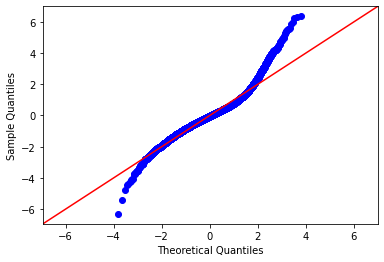

In [661]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

# Check Homoscedasticity Assumption

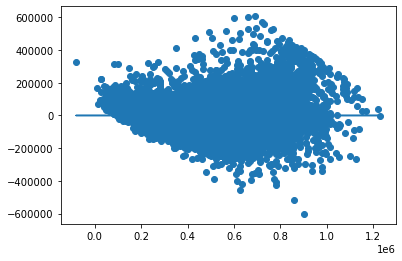

In [662]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

# Model 2: Remove yr_built and zip code

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19078 entries, 0 to 21596
Columns: 214 entries, price to basement_1
dtypes: float64(3), uint8(211)
memory usage: 4.4 MB


In [664]:
df.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-1.094025,-0.304754,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,0.945783,0.029881,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-2.212679,0.464870,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.235717,-0.469506,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.168241,0.177481,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [665]:
model_2_df = df[['price',
 'sqft_lot',
 'sqft_above',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'floors_2',
 'floors_3',
 'floors_4',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_12',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'renovated_1',
 'basement_1']]
     

KeyError: "['sqft_above', 'grade_12'] not in index"

In [ ]:
model_2_df.head()

In [ ]:
# Defining the problem
outcome = 'price'
x_cols = list(model_2_df.columns)
x_cols.remove(outcome)

In [ ]:
train, test = train_test_split(model_2_df)

In [ ]:
print(len(train), len(test))
train.head()

In [ ]:
test.head()

In [ ]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

# Model 3 based off model 2

# Stepwise Selection

In [ ]:
y = np.asarray(model_2_df['price'])
X = model_2_df.drop(['price'], axis = 1)
predictors = sm.add_constant(X)

In [ ]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward`-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [ ]:
result = stepwise_selection(predictors.astype(float), y.astype(float))
print('Features:')
print(result)

In [ ]:
print(len(result))

# Feature ranking with recursive feature elimination


Let us apply Recursive feature selection to see if we can reduce the number of features without sacrificing perfomance.

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 20)
selector = selector.fit(X, y)

In [ ]:
selected_columns = X.columns[selector.support_]
selected_columns
rfe_list = selected_columns.tolist()

#Stepwise and RFE gives us different lists of predictors to include. Lets see which ones are different.
for item in result: 
    if item in(rfe_list):
        pass
    else:
        print(item)

RFE states that these are the least important features within the model. Let's first try with them and without them.

In [ ]:
type(result)

In [ ]:
result.remove('const')

In [ ]:
# Defining the problem
outcome = 'price'
x_cols = result

In [ ]:
train, test = train_test_split(df)

In [ ]:
print(len(train), len(test))
train.head()

In [ ]:
test.head()

In [ ]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

In [ ]:
predictors

# Model 4: remove RFE based off model 2

In [ ]:
rfe_list_to_remove = {'floors_2', 
'sqft_above', 
'condition_3',
'sqft_lot',
'bedrooms_2',
'condition_2',
'bedrooms_5'}

In [ ]:
result2 = [ele for ele in result if ele not in rfe_list_to_remove] 

In [ ]:
result2

In [ ]:
# Defining the problem
outcome = 'price'
x_cols = result2

In [ ]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()